In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [0]:
env = gym.make("FrozenLake8x8-v0")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 30000
learning_rate = 0.1
max_steps = 299
discount = 0.96
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.0005

In [0]:
q_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [28]:
rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):
    # env.render()

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    if reward == 0 and done == True:
      reward = -1
    elif done == False:
      reward = 0
    else:
      reward = 1

    # Update q-table
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + 
                  discount * np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state

    cumul_rewards += reward
    if reward > 0:
      steps_till_success.append(step + 1)

    if done == True:
      break

  # env.render()
  if cumul_rewards < 1:
    steps_till_success.append(max_steps + 1)
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  if episode % 1000 == 0:
    learning_rate = learning_rate / 2
  rewards.append(cumul_rewards)
  # print("**********************************************************************")

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:-0.36946666666666667
Min step to success: 17


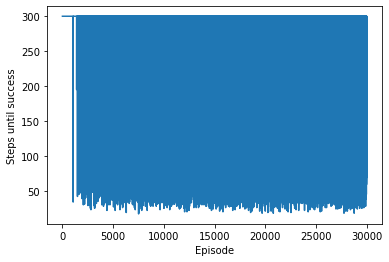

In [29]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

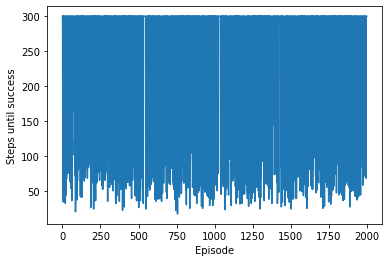

In [30]:
plt.plot(steps_till_success[-2001:-1])
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [31]:
print(q_table)

[[ 1.27582335e-03  9.54421213e-04  5.31834595e-03  1.56728507e-03]
 [ 5.33320054e-04  7.20719261e-03  1.39080335e-03  1.27264401e-03]
 [ 2.82206950e-03  3.76951715e-03  1.24133554e-02  4.20062437e-03]
 [ 3.62347106e-03  3.18318651e-03  6.12323306e-03  1.84043861e-02]
 [ 5.83338252e-03  5.36908176e-03  3.06589605e-02  4.00395322e-03]
 [ 1.15578915e-02  1.21802889e-02  4.73033691e-02  1.12107247e-02]
 [ 3.42765272e-02  3.48419159e-02  6.66501976e-02  3.31632985e-02]
 [ 6.85637058e-02  3.06905517e-02  3.06750706e-02  2.74935842e-02]
 [ 2.40944158e-04  2.97977630e-04  3.06769829e-04  5.14556899e-03]
 [-5.90207631e-03 -6.43526701e-03 -5.60377927e-03  6.65658529e-03]
 [-1.88554539e-02 -1.92388219e-02 -1.43434770e-02  1.01447422e-02]
 [-3.21375932e-01 -3.08902315e-01 -3.16236758e-01  1.48536060e-02]
 [-1.97188761e-02 -1.48556529e-02 -1.50760192e-02  2.52978524e-02]
 [ 1.81813246e-03  7.10961964e-03  4.37340809e-02  1.22002958e-02]
 [ 3.88879046e-02  4.38410734e-02  7.91796231e-02  3.75798505e

In [33]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 86
****************************************************
EPISODE  1
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 71
****************************************************
EPISODE  2
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 155
****************************************************
EPISODE  3
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 118
****************************************************
EPISODE  4
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 61


In [35]:
total_reward = 0
steps = []

for episode in range(1000):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          if reward > 0:
            steps.append(step + 1)
          # else:
          #   step.append(max_steps + 1)
          break
        state = new_state
env.close()

print(f'Successful runs out of 100: {total_reward}')
print(f'Average steps: {np.mean(steps)}')
print(np.var(steps))

Successful runs out of 100: 606.0
Average steps: 84.41419141914191
1521.5825708808504
